## CIT-223-018/2021 ANDERSON MACHARIA KINYUA

## Drawing a straight line in python using line drawing algorithms i.e slope intercept algorithm and DDA algorithm

In [24]:
# import matplotlib package to visualize our results
import matplotlib.pyplot as plt
import matplotlib as mplt
import seaborn as sns
import pandas as pd

class line_drawing_algorithms:
    def __init__(self, start_point, end_point):
        self.start_point = start_point
        self.end_point = end_point

    def slope_intercept(self):
        # unzip the tuples in parameters
        start_x, start_y = self.start_point
        end_x, end_y = self.end_point    
    
        # Find the gradient
        m = (end_y - start_y) / (end_x - start_x)
    
        # Get the y_intercept
        # Remember c = y - mx
        c = start_y - (m * (start_x))
    
        '''We are going to use our generated equation to generate a list of x and y values. y will be incremented by
        1 whereas we find the value of y. These values will be placed in a list then plotted'''
        x_values = []
        y_values = []
        # For our loop to run, we must check to ensure the start is smaller than the end - test3 will not run without this procedure
        if start_x > end_x:
            swap = start_x, start_y
            start_x, start_y = end_x, end_y
            end_x, end_y = swap
            
        for x in range(start_x, end_x + 1):
            x_values.append(x)
            y = m * (x) + c
            # round function rounds of the value of y
            y_values.append(round(y, 0))
        # print out the equation of the line
        print(f"The equation of the line in slope intercept algorithm is: y = {m}x + {c}")
        # Print out the values in our table
        print(f"X values for slope intercept algorithm: {x_values}")
        print("Y values for slope intercept algorithm: {}".format(y_values))
        # Call the function to draw the line
        self.drawing(x_values, y_values, "slope intercept")
    
    def DDA(self):
        # unzip tuples in parameters
        start_x, start_y = self.start_point
        end_x, end_y = self.end_point
        # find the gradient of the line
        m = (end_y - start_y) / (end_x - start_x)
        # check if the gradient is below or above one
        # Create a list that will hold  the x and y values
        x_values = []
        y_values = []
        # For our loop to run, we must check to ensure the start is smaller than the end
        if start_x > end_x:
            swap = start_x, start_y
            start_x, start_y = end_x, end_y
            end_x, end_y = swap
            
        # check if gradient is below 1
        if m < 1 and m > 0:
            y = start_y
            for x in range(start_x, end_x + 1):
                x_values.append(x)
                y_values.append(round(y, 0))
                y += m
        elif m >= 1:
            x = start_x
            for y in range(start_y, end_y + 1):
                y_values.append(y)
                x_values.append(round(x, 0))
                # we add the inverse of gradient to each subsequent value of x
                x += (m ** -1)
        # Print out the values in our table
        print(f"X values for DDA algorithm: {x_values}")
        print("Y values for DDA algorithm: {}".format(y_values))
        # Call the function to draw the line
        self.drawing(x_values, y_values, "DDA")
    
    def bresenham(self):
        # unzip tuples in parameters
        start_x, start_y = self.start_point
        end_x, end_y = self.end_point
        # For our loop to run, we must check to ensure the start is smaller than the end
        if start_x > end_x:
            swap = start_x, start_y 
            start_x, start_y = end_x, end_y
            end_x, end_y = swap
        # calculate the change in y and x
        change_y = end_y - start_y
        change_x = end_x - start_x
        # find the gradient
        m = change_y / change_x
        # create a list of x and y values
        x_values = []
        y_values = []
        P = 2 * (change_y) - (change_x)
        y = start_y
        # loop over the x values while calculating Y and P
        for i in range(start_x, end_x + 1):
            x_values.append(i)
            if P >= 0:
                y_values.append(y)
                y += 1
                P += (2 * (change_y - change_x))
            else:
                y_values.append(y)
                P += change_y
        # Print out the values in our table
        print(f"X values for Brese: {x_values}")
        print("Y values to be plotted: {}".format(y_values))
        # Call the function to draw the line
        self.drawing(x_values, y_values, "DDA")
    
    def drawing(self, x_values, y_values, title):
        x = [int(i) for i in x_values]
        y = [int(i) for i in y_values]
        # Reversed the y values list so as to begin from the bottom left
        y.reverse()
        # determine the dimensions of the grid
        # Determine the dimensions of the grid
        grid_width = max(x) + 1
        grid_height = max(y) + 1

        # Create an empty grid of False values
        grid = [[False] * grid_width for _ in range(grid_height)]

        # Mark the cells as True where the points are
        for xi, yi in zip(x, y):
            grid[int(yi)][xi] = True

        # Create a DataFrame from the grid
        df = pd.DataFrame(grid)

        from matplotlib.colors import LinearSegmentedColormap
        f, ax = plt.subplots(figsize=(8, 8))
        colors = ['lightgray', 'black']
        cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))
        
        _ = sns.heatmap(df, cmap = cmap, square = True, linewidths =.5, cbar_kws={"shrink":.5})
        colorbar = ax.collections[0].colorbar
#         colorbar.set_ticks([0.25, 0.75])
#         colorbar.set_ticklabels(['0', '1'])

In [28]:
test = line_drawing_algorithms((0, 0), (10, 20))
x, y = test.bresenham()
print(x)
print(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


The equation of the line in slope intercept algorithm is: y = 0.6x + 0.0
X values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Y values to be plotted: [0.0, 1.0, 1.0, 2.0, 2.0, 3.0, 4.0, 4.0, 5.0, 5.0, 6.0]
X values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Y values to be plotted: [0, 1.0, 1.0, 2.0, 2.0, 3.0, 4.0, 4.0, 5.0, 5.0, 6.0]


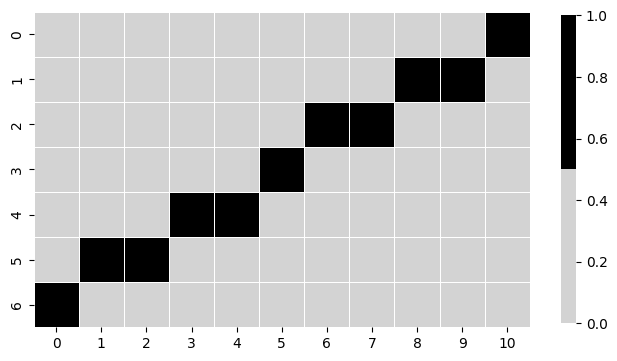

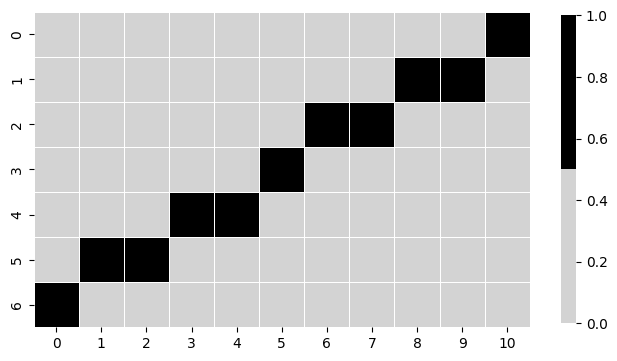

In [21]:
test1 = line_drawing_algorithms((0, 0), (10, 6))
test1.slope_intercept()
test1.DDA()

The equation of the line in slope intercept algorithm is: y = 0.6x + 0.0
X values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Y values to be plotted: [0.0, 1.0, 1.0, 2.0, 2.0, 3.0, 4.0, 4.0, 5.0, 5.0, 6.0]
X values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Y values to be plotted: [0, 1.0, 1.0, 2.0, 2.0, 3.0, 4.0, 4.0, 5.0, 5.0, 6.0]


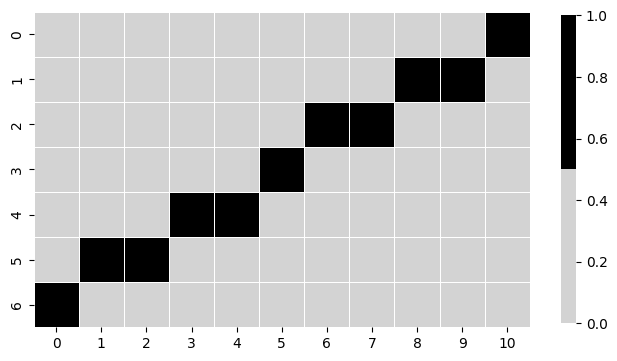

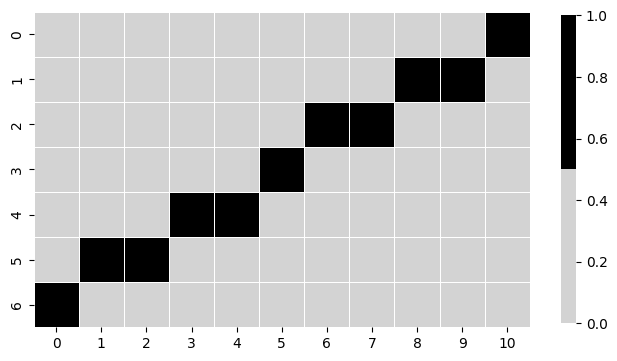

In [16]:
test1 = line_drawing_algorithms((0, 0), (10, 6))
test1.slope_intercept()
test1.DDA()

The equation of the line in slope intercept algorithm is: y = 2.0x + 0.0
X values: [1, 2, 3, 4, 5, 6]
Y values to be plotted: [2.0, 4.0, 6.0, 8.0, 10.0, 12.0]
X values: [1, 2.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0, 5.0, 6.0, 6.0]
Y values to be plotted: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


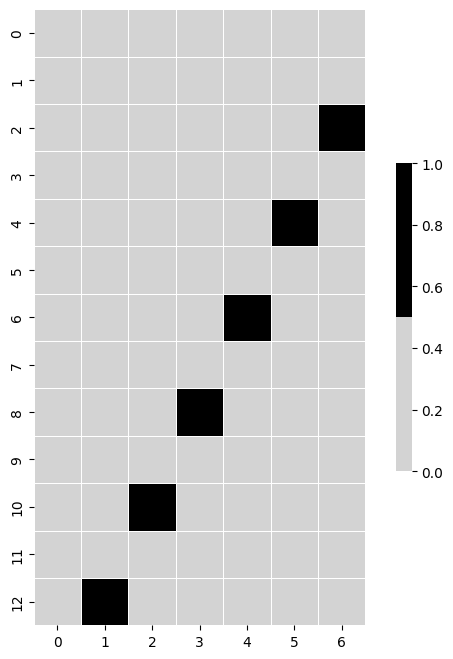

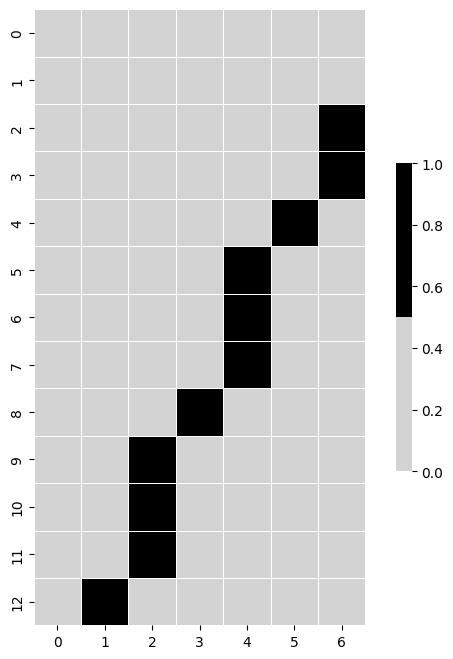

In [17]:
test2 = line_drawing_algorithms((1, 2), (6, 12))
test2.slope_intercept()
test2.DDA()

The equation of the line in slope intercept algorithm is: y = 0.5x + 0.0
X values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Y values to be plotted: [0.0, 0.0, 1.0, 2.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0, 5.0]
X values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Y values to be plotted: [0, 0.0, 1.0, 2.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0, 5.0]


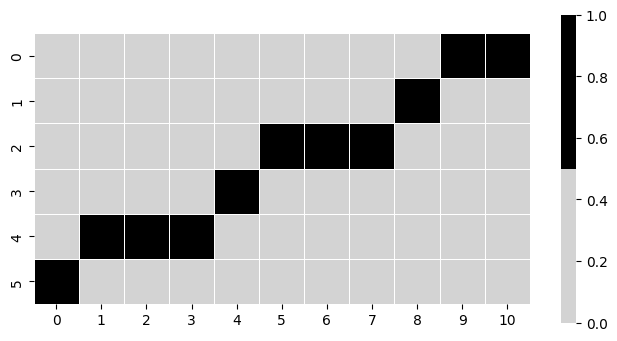

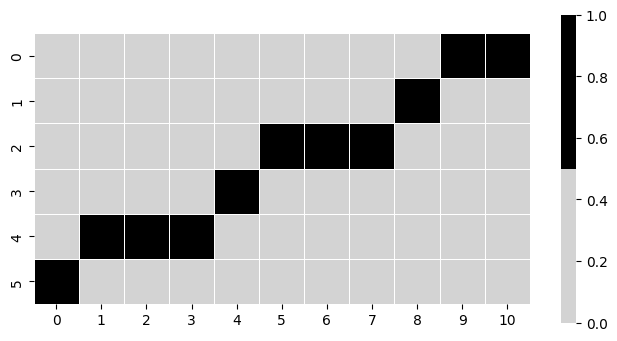

In [18]:
test3 = line_drawing_algorithms((10, 5), (0, 0))
test3.slope_intercept()
test3.DDA()

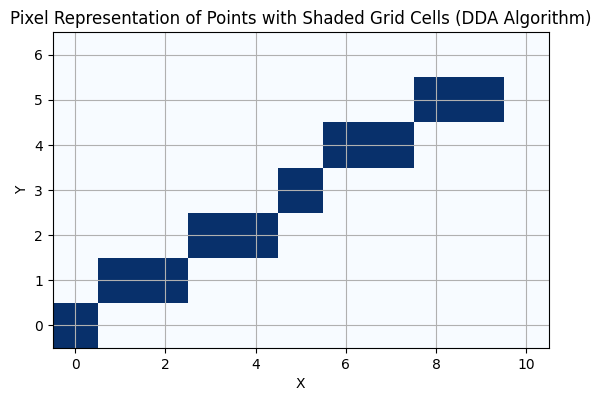

In [20]:
import matplotlib.pyplot as plt

# Arrays
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [0, 1.0, 1.0, 2.0, 2.0, 3.0, 4.0, 4.0, 5.0, 5.0, 6.0]

# Create a figure and axis
fig, ax = plt.subplots()

# Define the grid dimensions
grid_width = 11  # The same as the number of x points
grid_height = 7   # The same as the number of y points

# Create a grid of zeros to represent the cells
grid = [[0 for _ in range(grid_width)] for _ in range(grid_height)]

# Loop through the line segments between points and shade the cells
for i in range(len(x) - 1):
    x0, y0 = int(x[i]), int(y[i])
    x1, y1 = int(x[i + 1]), int(y[i + 1])

    # DDA algorithm to draw the line
    dx = x1 - x0
    dy = y1 - y0
    steps = max(abs(dx), abs(dy))
    x_increment = dx / steps
    y_increment = dy / steps

    for _ in range(int(steps)):
        grid[y0][x0] = 1  # Shade the cell
        x0 += x_increment
        y0 += y_increment

# Plot the grid as an image
ax.imshow(grid, cmap='Blues', origin='lower')

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Set a title for the plot
ax.set_title('Pixel Representation of Points with Shaded Grid Cells (DDA Algorithm)')

# Show the plot
plt.grid(True)
plt.show()
